In [1]:
import pandas as pd


my_dia = pd.read_csv("C:/Users/Caroline Kries/sciebo/Forschungsprojekt Medikamenteninteraktion/03_Daten/my_dia")
my_medi = pd.read_csv("C:/Users/Caroline Kries/sciebo/Forschungsprojekt Medikamenteninteraktion/03_Daten/my_medi")
my_inhalt = pd.read_csv("C:/Users/Caroline Kries/sciebo/Forschungsprojekt Medikamenteninteraktion/03_Daten/my_inhalt")

C:\Users\Caroline Kries\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
my_dia

,Unnamed: 0,id,klientid,giltab,giltbis,bezeichnung,code,status,statusname
0,1362,1363,3181,NaN,NaN,Herzinsuffizeinz,NaN,-1,Keine Angabe
1,1363,1364,3181,NaN,NaN,Hemiparese rechts auf den Boden einer Multiinf...,NaN,-1,Keine Angabe
2,1364,1365,3181,NaN,NaN,Hypertonie,NaN,-1,Keine Angabe
3,1365,1366,3181,NaN,NaN,Diabetes mellitus,NaN,-1,Keine Angabe
4,1366,1367,3181,NaN,NaN,Massive Obstipation,NaN,-1,Keine Angabe
...,...,...,...,...,...,...,...,...,...
1458,69318,69319,22239,2021-10-09,NaN,Stabile vordere und hintere Beckenringfraktur ...,NaN,-1,Keine Angabe
1459,69319,69320,22239,2021-10-09,NaN,Unterschenkelprellung links,NaN,-1,Keine Angabe
1460,69320,69321,22239,2021-10-09,NaN,Unterschenkelprellung links,NaN,-1,Keine Angabe
1461,69321,69322,22239,2021-10-09,NaN,Hüftprellung links,NaN,-1,Keine Angabe


In [3]:
my_dia["giltab"] = pd.to_datetime(my_dia.giltab)

In [4]:
klienten = my_dia.klientid.unique()

In [5]:
df1 = my_dia[my_dia.klientid == klienten[10]]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

names = list(df1.bezeichnung)

dates = list(df1.giltab)

In [7]:
def plot_timeline(names, dates):
    # Choose some nice levels
    levels = np.tile([-7, 7, -5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True)
    ax.set(title="Matplotlib release dates")

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

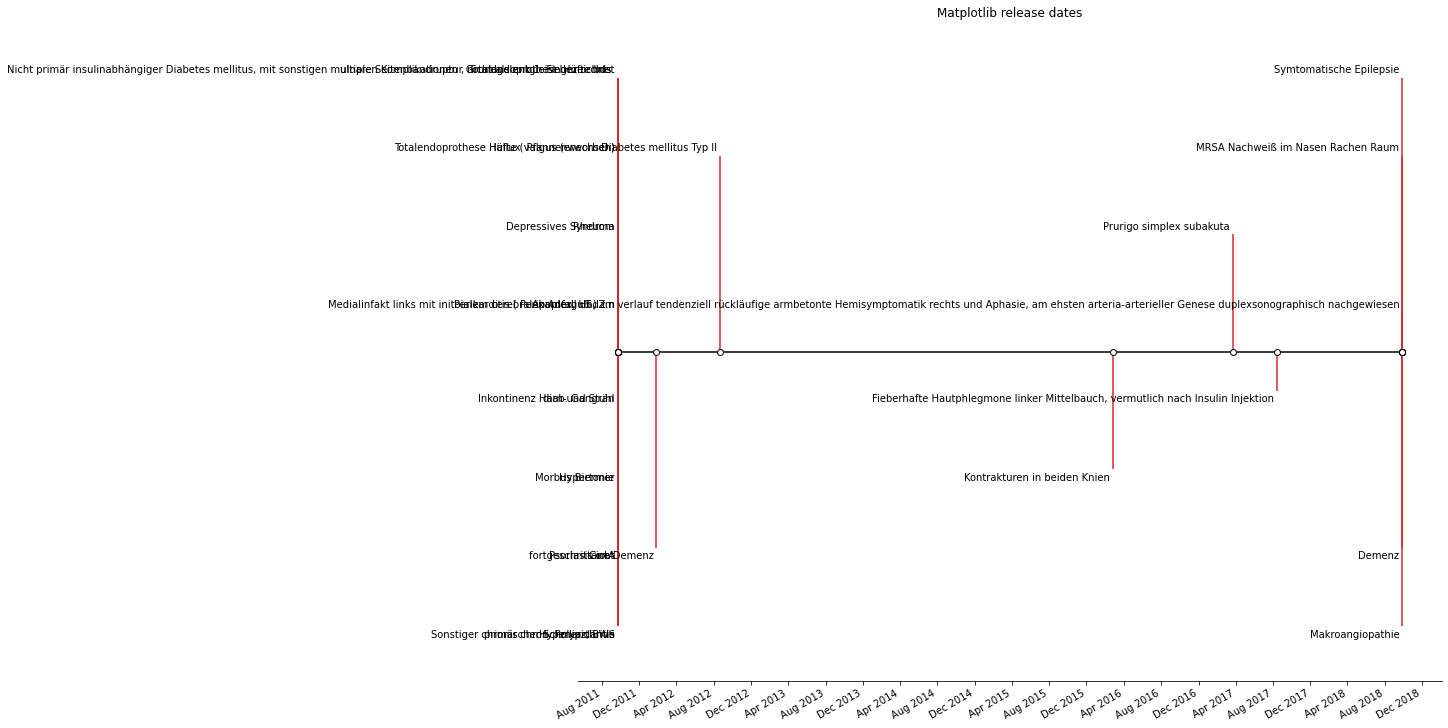

In [8]:
plot_timeline(names, dates)

C:\Users\Caroline Kries\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caroline Kries\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Caroline Kries\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caroline Kries\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


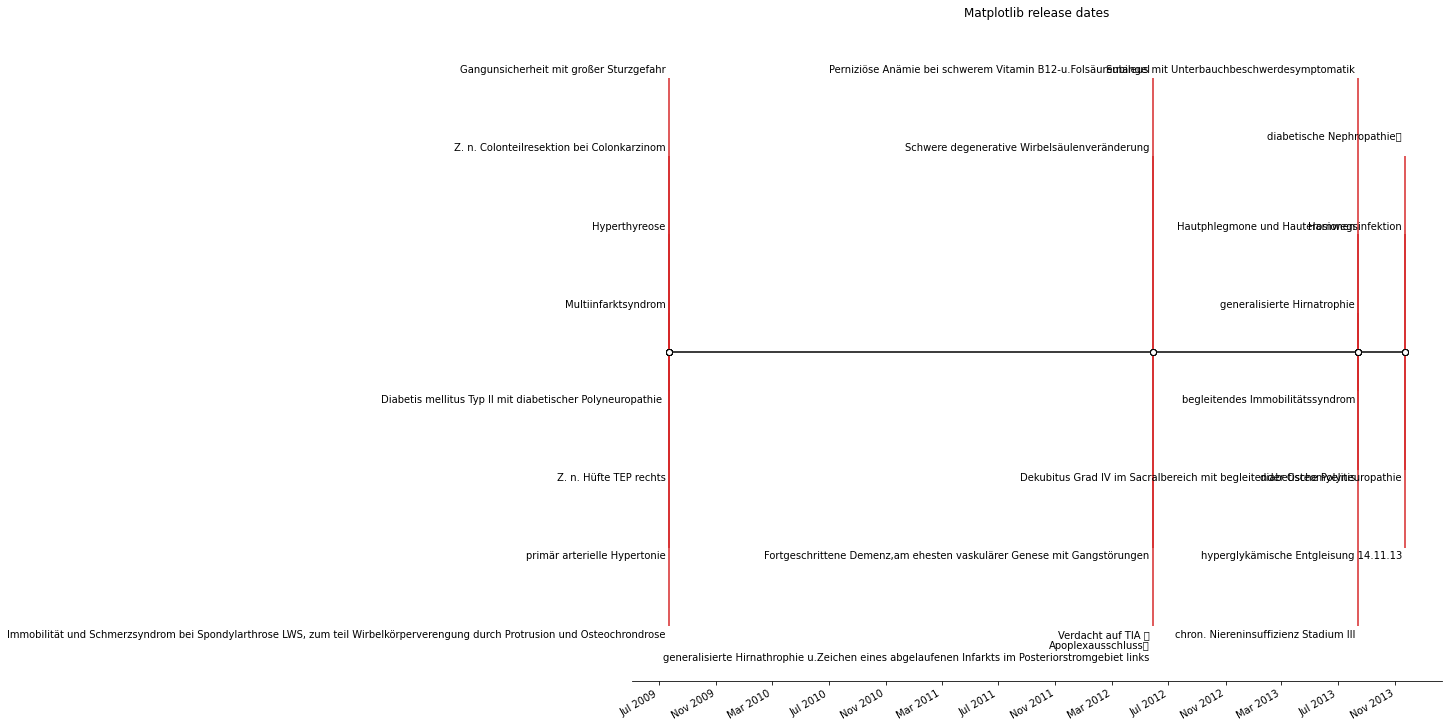

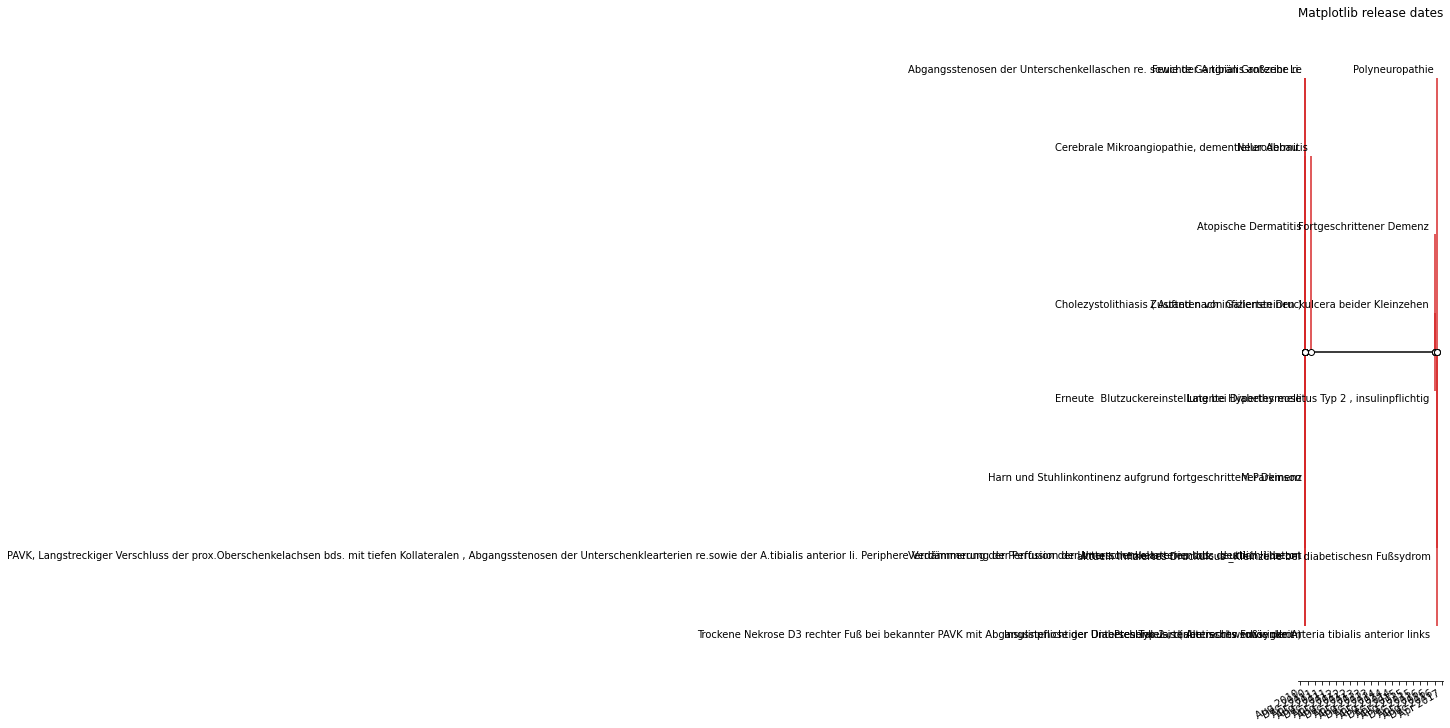

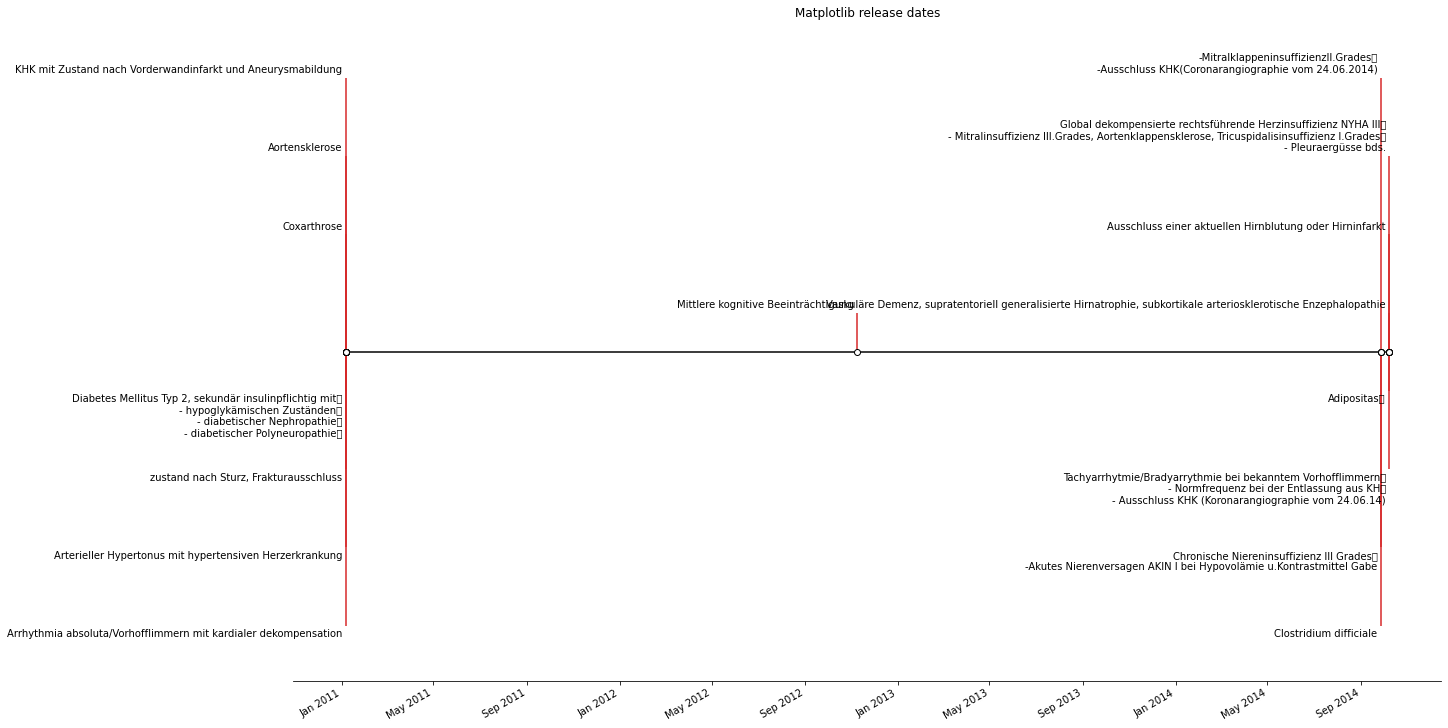

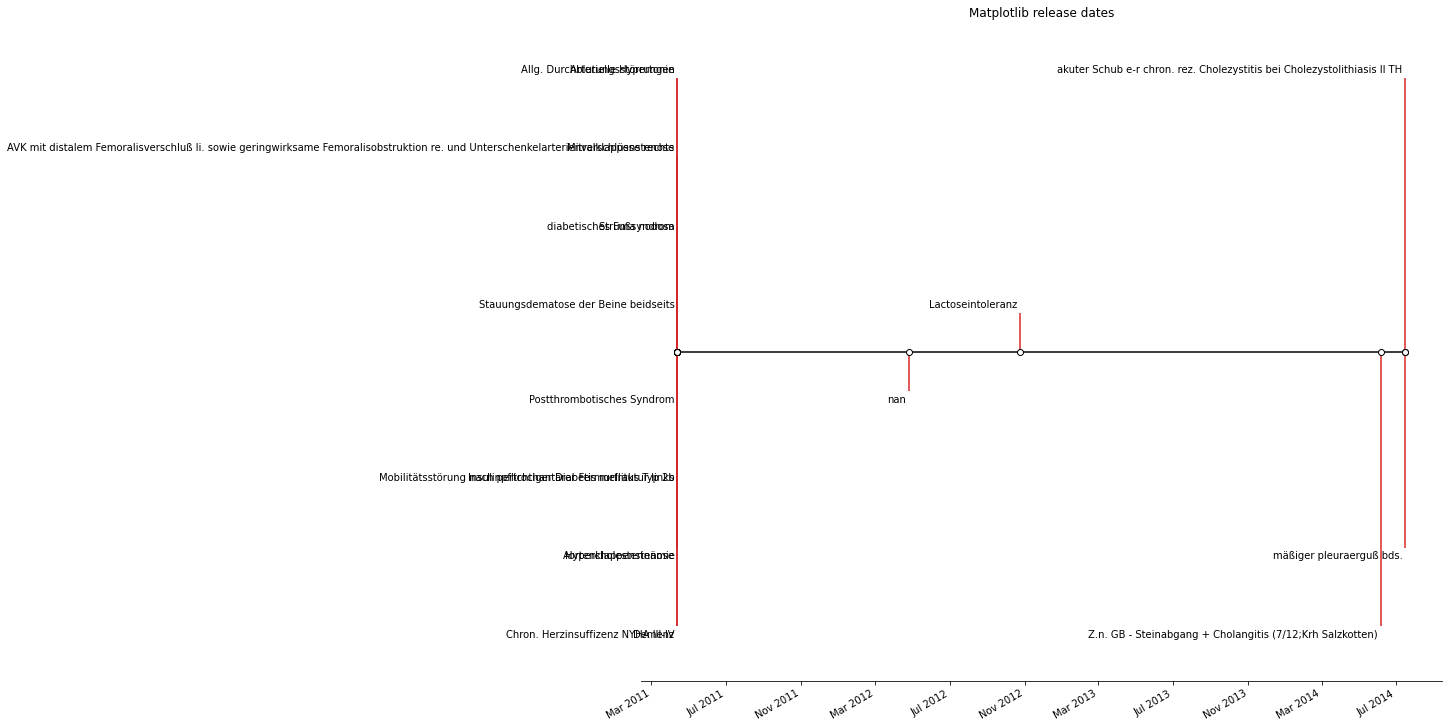

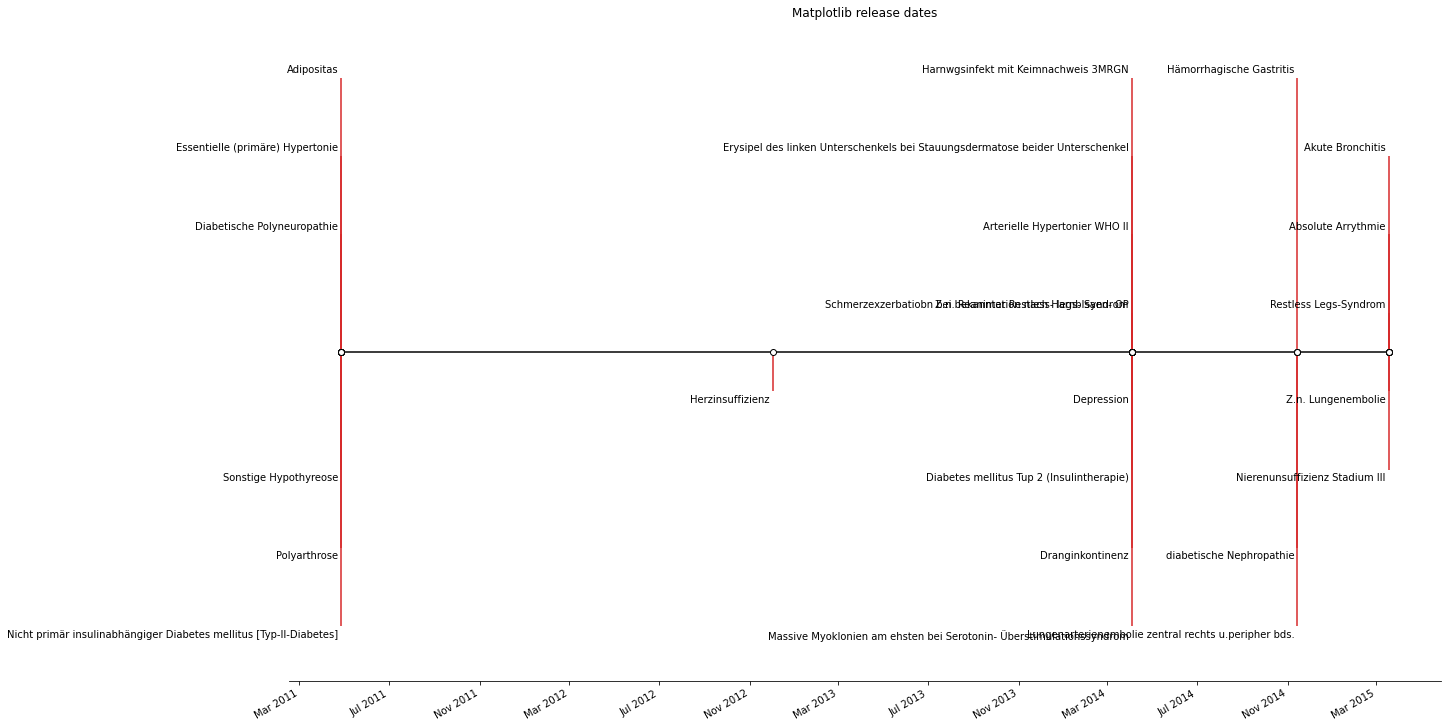

In [9]:
for k in klienten[5:10]:
    df1 = my_dia[my_dia.klientid == k]
    names = list(df1.bezeichnung)
    dates = list(df1.giltab)
    plot_timeline(names, dates)


In [10]:


pzn_wirk = my_inhalt[["pzn","bezeichnung"]]
pzn_wirk = pzn_wirk.rename(columns={"pzn":"pzn","bezeichnung":"wirkstoff"})

my_medi_wirk = pd.merge(my_medi, pzn_wirk,how="left",on="pzn")
my_medi_wirk["tag"] = pd.to_datetime(my_medi_wirk["tag"])
my_medi_wirk

,Unnamed: 0,id,klientid,tag,datum,bezeichnung,pzn,menge,einheit,wirkstoff
0,38851,38852,3734,2007-08-18,2007-08-18 06:30:00,Euthyrox 75 Mikrogramm TAB,2754708,1,Stck,Levothyroxin natrium
1,38852,38853,3734,2007-08-19,2007-08-19 06:30:00,Euthyrox 75 Mikrogramm TAB,2754708,1,Stck,Levothyroxin natrium
2,38853,38854,3734,2007-08-20,2007-08-20 06:30:00,Euthyrox 75 Mikrogramm TAB,2754708,1,Stck,Levothyroxin natrium
3,38854,38855,3734,2007-08-21,2007-08-21 06:30:00,Euthyrox 75 Mikrogramm TAB,2754708,1,Stck,Levothyroxin natrium
4,38855,38856,3734,2007-08-22,2007-08-22 06:30:00,Euthyrox 75 Mikrogramm TAB,2754708,1,Stck,Levothyroxin natrium
...,...,...,...,...,...,...,...,...,...,...
1314188,26335959,26335960,22906,2021-11-08,2021-11-08 18:00:00,"Eliquis 2,5mg FTA",8400029.0,1,Stck,Apixaban
1314189,26335960,26335961,22906,2021-11-09,2021-11-09 06:30:00,"Eliquis 2,5mg FTA",8400029.0,1,Stck,Apixaban
1314190,26335961,26335962,22906,2021-11-09,2021-11-09 18:00:00,"Eliquis 2,5mg FTA",8400029.0,1,Stck,Apixaban
1314191,26335962,26335963,22906,2021-11-10,2021-11-10 06:30:00,"Eliquis 2,5mg FTA",8400029.0,1,Stck,Apixaban


In [11]:

medi1 = my_medi_wirk[my_medi_wirk.klientid == klienten[3]]
df = medi1[["tag","wirkstoff"]]
df.dropna(how="any",inplace=True)

<ipython-input-11-6e8a9d86d282>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how="any",inplace=True)


In [12]:
df

,tag,wirkstoff
0,2007-08-18,Levothyroxin natrium
1,2007-08-19,Levothyroxin natrium
2,2007-08-20,Levothyroxin natrium
3,2007-08-21,Levothyroxin natrium
4,2007-08-22,Levothyroxin natrium
...,...,...
1230147,2015-04-13,Captopril
1230148,2015-04-13,Captopril
1230149,2015-04-14,Captopril
1230150,2015-04-14,Captopril


In [13]:
names = list(df.wirkstoff)
uniquenames = list(set(names))
dates = list(df.tag)
zip_list = list(zip(names,dates))

mydict = {}
for x in uniquenames:
    mydict[x] = []
    for z in zip_list:
        if z[0] == x:
            mydict[x].append(z[1])


mydict

{'Clonazepam': [Timestamp('2007-08-18 00:00:00'),
  Timestamp('2007-08-19 00:00:00'),
  Timestamp('2007-08-20 00:00:00'),
  Timestamp('2007-08-21 00:00:00'),
  Timestamp('2007-08-22 00:00:00'),
  Timestamp('2007-08-23 00:00:00'),
  Timestamp('2007-08-24 00:00:00'),
  Timestamp('2007-08-25 00:00:00'),
  Timestamp('2007-08-26 00:00:00'),
  Timestamp('2007-08-27 00:00:00'),
  Timestamp('2007-08-28 00:00:00'),
  Timestamp('2007-08-29 00:00:00'),
  Timestamp('2007-08-30 00:00:00'),
  Timestamp('2007-08-31 00:00:00'),
  Timestamp('2007-09-01 00:00:00'),
  Timestamp('2007-09-02 00:00:00'),
  Timestamp('2007-09-03 00:00:00'),
  Timestamp('2007-09-04 00:00:00'),
  Timestamp('2007-09-05 00:00:00'),
  Timestamp('2007-09-07 00:00:00'),
  Timestamp('2008-06-12 00:00:00'),
  Timestamp('2008-06-13 00:00:00'),
  Timestamp('2008-06-14 00:00:00'),
  Timestamp('2008-06-15 00:00:00'),
  Timestamp('2008-06-16 00:00:00'),
  Timestamp('2008-06-17 00:00:00'),
  Timestamp('2008-06-18 00:00:00'),
  Timestamp('2

In [14]:
import datetime
begin = {}
end = {}
for name in mydict.keys():
    newtime = [mydict[name][0]]
    endtime = []
    currenttime = mydict[name][0]
    for timestamp in mydict[name]:
        if timestamp - currenttime > datetime.timedelta(days=14):
            newtime.append(timestamp)
            endtime.append(currenttime)
        currenttime = timestamp
    endtime.append(mydict[name][-1])
    begin[name] = newtime
    end[name] = endtime



In [15]:
list(begin.keys())[0]

'Clonazepam'

In [16]:
names = []
begin_dates = []
end_dates = []
for name in list(begin.keys()):
    timelist = begin[name]
    for time in timelist:
        names.append(name)
        begin_dates.append(time)
    timelist2 = end[name]
    for time in timelist2:
        end_dates.append(time)

In [17]:
len(end_dates)

147

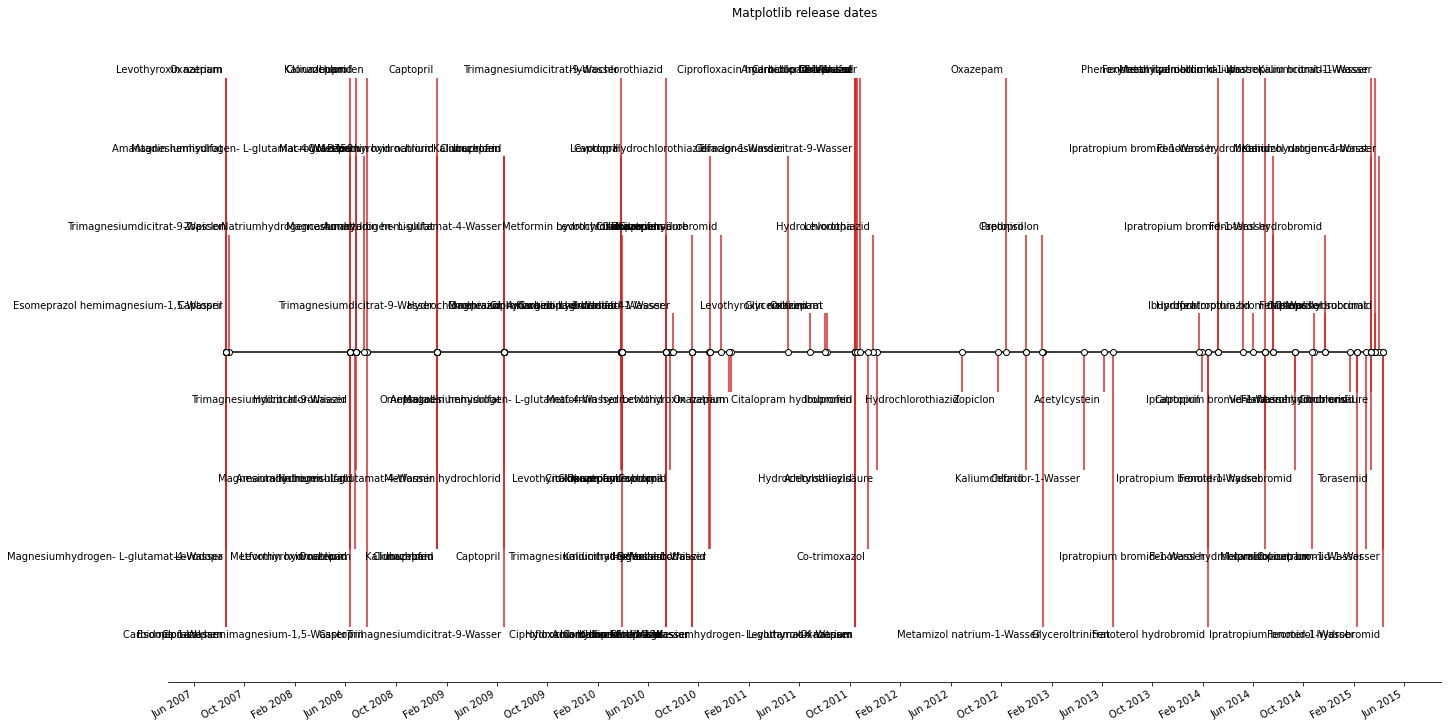

In [18]:
plot_timeline(names, begin_dates)


In [23]:
len(set(names))
names

['Clonazepam',
 'Clonazepam',
 'Clonazepam',
 'Clonazepam',
 'Clonazepam',
 'Clonazepam',
 'Venlafaxin hydrochlorid',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Captopril',
 'Kaliumcitrat-1-Wasser',
 'Kaliumcitrat-1-Wasser',
 'Metformin hydrochlorid',
 'Metformin hydrochlorid',
 'Metformin hydrochlorid',
 'Metformin hydrochlorid',
 'Metformin hydrochlorid',
 'Glyceroltrinitrat',
 'Glyceroltrinitrat',
 'Phenoxymethylpenicillin kalium',
 'Levodopa',
 'Levodopa',
 'Levodopa',
 'Levodopa',
 'Acetylcystein',
 'Metoprolol succinat',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Fenoterol hydrobromid',
 'Levothyroxin natrium',
 'Levothyroxin natrium',
 'Levothyroxin natrium',
 'Levothyroxin natrium',
 'Levothyroxin natrium',
 'Levothyroxin natrium',
 'Levothyrox

In [20]:
begin

{'Clonazepam': [Timestamp('2007-08-18 00:00:00'),
  Timestamp('2008-06-12 00:00:00'),
  Timestamp('2009-01-08 00:00:00'),
  Timestamp('2009-06-19 00:00:00'),
  Timestamp('2010-03-30 00:00:00'),
  Timestamp('2010-07-15 00:00:00')],
 'Venlafaxin hydrochlorid': [Timestamp('2015-01-21 00:00:00')],
 'Captopril': [Timestamp('2007-08-17 00:00:00'),
  Timestamp('2008-07-22 00:00:00'),
  Timestamp('2009-01-07 00:00:00'),
  Timestamp('2009-06-19 00:00:00'),
  Timestamp('2010-03-29 00:00:00'),
  Timestamp('2010-07-15 00:00:00'),
  Timestamp('2012-12-01 00:00:00'),
  Timestamp('2014-01-30 00:00:00'),
  Timestamp('2014-10-27 00:00:00')],
 'Kaliumcitrat-1-Wasser': [Timestamp('2010-09-16 00:00:00'),
  Timestamp('2015-03-14 00:00:00')],
 'Metformin hydrochlorid': [Timestamp('2008-06-12 00:00:00'),
  Timestamp('2009-01-08 00:00:00'),
  Timestamp('2009-06-19 00:00:00'),
  Timestamp('2010-03-30 00:00:00'),
  Timestamp('2010-07-15 00:00:00')],
 'Glyceroltrinitrat': [Timestamp('2011-08-07 00:00:00'),
  Tim

In [21]:
end

{'Clonazepam': [Timestamp('2007-09-07 00:00:00'),
  Timestamp('2008-08-06 00:00:00'),
  Timestamp('2009-01-31 00:00:00'),
  Timestamp('2009-07-06 00:00:00'),
  Timestamp('2010-04-23 00:00:00'),
  Timestamp('2010-07-29 00:00:00')],
 'Venlafaxin hydrochlorid': [Timestamp('2015-04-15 00:00:00')],
 'Captopril': [Timestamp('2007-09-07 00:00:00'),
  Timestamp('2008-08-06 00:00:00'),
  Timestamp('2009-01-31 00:00:00'),
  Timestamp('2009-07-06 00:00:00'),
  Timestamp('2010-04-23 00:00:00'),
  Timestamp('2011-07-18 00:00:00'),
  Timestamp('2014-01-08 00:00:00'),
  Timestamp('2014-10-12 00:00:00'),
  Timestamp('2015-04-15 00:00:00')],
 'Kaliumcitrat-1-Wasser': [Timestamp('2010-09-21 00:00:00'),
  Timestamp('2015-03-26 00:00:00')],
 'Metformin hydrochlorid': [Timestamp('2008-08-06 00:00:00'),
  Timestamp('2009-01-31 00:00:00'),
  Timestamp('2009-07-06 00:00:00'),
  Timestamp('2010-04-23 00:00:00'),
  Timestamp('2011-07-05 00:00:00')],
 'Glyceroltrinitrat': [Timestamp('2011-08-07 00:00:00'),
  Tim